In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# The impact of ridge vs lasso regularization

In this notebook, we will explore the impact of ridge vs lasso regression as well the impact of the alpha parameter.

We will do so by generating a dataset through a linear process such that we should be able to fit a linear regression to it easily. We will then make copies of this dataset, one by adding noise and one by making some of the variables redundant. We should be able to fit the original dataset w/out regularization. Ridge should work better on the one that has noise and lasso should improve the one w/ redundant features.

Note that we are not splitting our data as we are not trying to make any generalized predictions.

### Dataset Generation

In [2]:
from sklearn.datasets import make_regression

In [29]:
def generate_dataset():
    # This generates data according to a linear models with coefficents coef
    # Our goal is to find coef from the (X, y) coordinates

    # It is a standard practice to set the random seed at the beginning of an experiment to make it repeatable
    # It is also common to set it to 42. If you don't know why, I encourage you to find out
    X, y, coef = make_regression(n_samples=10, n_features=10, n_informative=8, coef=True, noise=10, random_state=42)

    # add noise from a gaussian distribution
    np.random.seed(42)
    X_noisy = X.copy()
    noise_level = .5  # Adjust the noise level as desired
    noise = np.random.normal(0, noise_level, X.shape)
    X_noisy = X + noise
    

    # Make five of the features uninformative by making them copies of each other, thereby providing no additional
    X_uninformative = X.copy()
    X_uninformative[:, 5:10] = X_uninformative[:, :5]

    return X, X_noisy, X_uninformative, y

# Assignment

I will fit a model without regularization to the original data

You will
  * For the noisy and redundant datasets
    * Plot all three models and their rmse on the same plot with alpha = 1
        * Call the model constructor with the named parameter alpha
        * Call the model.fit and predict methods 
    * For alpha values in [0, 0.1, 0.2, ..., 1] (`np.arange(0, 1.1, .1)`)
      * use the appropriate model
      * Plot the rmse of each alpha (on a single plot)
      * Plot the models for alpha = [0, 0.3, 0.6, 1] on a single plot  
     
How big of an effect does the choice of alpha have? Is there a clear winner?

To do the plotting, we will use the `matplotlib.pyplot` functions:
  * `plot` to draw a line plot of the regression, and
  * `scatter` to draw a scatter plot of the inputs. 

`matplotlib.pyplot` is always imported as `plt`. Don't forget to `plt.show()` when you are done.

In [4]:
def plot_linear(predictions, y):
    plt.scatter(range(len(y)), y, label="Actual", marker="x", color="r")
    plt.plot(predictions, label=f"Predicted Alpha: 0, RMSE: 0")
    plt.title("Linear Model")
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    # set the position of the xticks and their values
    plt.xticks(range(len(y)), range(1, len(y)+1))
    plt.legend()
    plt.show()

In [30]:
# We will make use of the nightmare that is global scope here, b/c it is also the best way to handle the data science workflow
# Life is all about choices...
X, X_noisy, X_uninformative, y = generate_dataset()

In [6]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse

In [7]:
# first call the constructor
# the ridge and lasso constructors take the named parameter alpha
regressor = LinearRegression()

# all sklearn models have fit and predict functions
regressor.fit(X, y)
prediction = regressor.predict(X)
print(f"RMSE: {rmse(y, prediction):0.3f}")

RMSE: 0.000


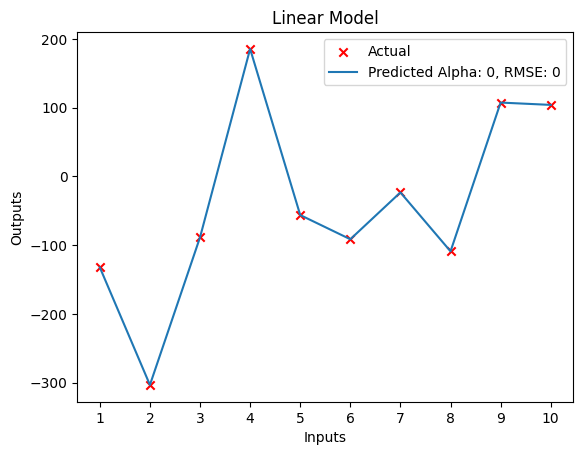

In [8]:
plot_linear(prediction, y)

#### We tried to fit a linear regression to a linear model and, unsurprisingly, it worked

### Note that 1, 2, 3, ... are not the inputs themselves, they are the order of the inputs

# Your turn

In [47]:
def plot_rmses(dataset_name, rmses):
    """Given the name of the dataset and a list of rmses, it will plot them."""
    plt.scatter(np.arange(0, 1.1, 0.1), rmses, marker="x", color="r")
    plt.plot(np.arange(0, 1.1, 0.1), rmses)
    plt.title(f"{dataset_name} RMSEs")
    plt.xlabel("Alpha")
    plt.ylabel("RMSE")
    plt.ylim(min(rmses)-500, max(rmses[1:])+500)
    plt.show()

In [39]:
def plot_alphas(dataset_name, alpha_preds, y):
    """Plot a list of lists of predictions for alpha = 0, .3, .6, 1 against the correct answer for a given dataset"""
    # alpha_preds is a list of lists of predictions
    
    plt.scatter(range(len(y)), y, label="Actual", marker="x", color="r")
    alphas = [0, .3, .6, 1]
    for i, pred in enumerate(alpha_preds):
        plt.plot(pred, label=f"alpha: {alphas[i]}")
    plt.title(f"{dataset_name} predictions")
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    # set the position of the xticks and their values
    plt.xticks(range(len(y)), range(1, len(y)+1))
    plt.legend()
    plt.show()

In [40]:
def plot_models(dataset_name, linear_preds, lasso_preds, ridge_preds, y):
    """Given predictions from each of the three models, it will plot them and their performance"""
    plt.scatter(range(len(y)), y, label="Actual", marker="x", color="r")
    plt.plot(linear_preds, label=f"Linear: {rmse(y, linear_preds):0.3f}")
    plt.plot(lasso_preds, label=f"Lasso: {rmse(y, lasso_preds):0.3f}")
    plt.plot(ridge_preds, label=f"Ridge: {rmse(y, ridge_preds):0.3f}")
    plt.title(f"{dataset_name} models")
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    # set the position of the xticks and their values
    plt.xticks(range(len(y)), range(1, len(y)+1))
    plt.legend()
    plt.show()

## Noisy

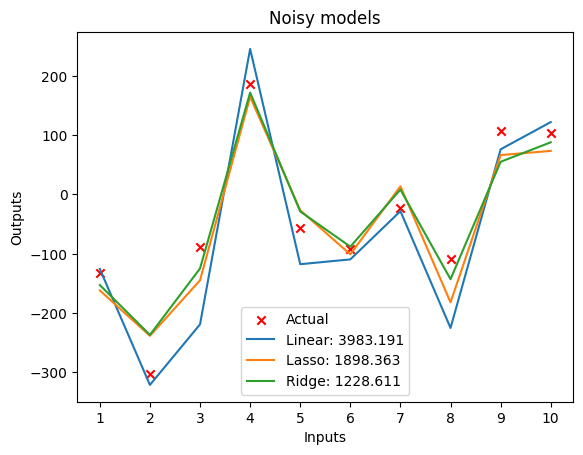

In [31]:
# fit all three models w/ alpha = 1 and pass them into plot_models
linear = LinearRegression()
lasso = Lasso(alpha=1)
ridge = Ridge(alpha=1)

linear.fit(X_noisy, y)
lasso.fit(X_noisy, y)
ridge.fit(X_noisy, y)

linear_preds = linear.predict(X)
lasso_preds = lasso.predict(X)
ridge_preds = ridge.predict(X)

plot_models("Noisy", linear_preds, lasso_preds, ridge_preds, y)

/home/pgolbus/venvs/jupyter/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.93517e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


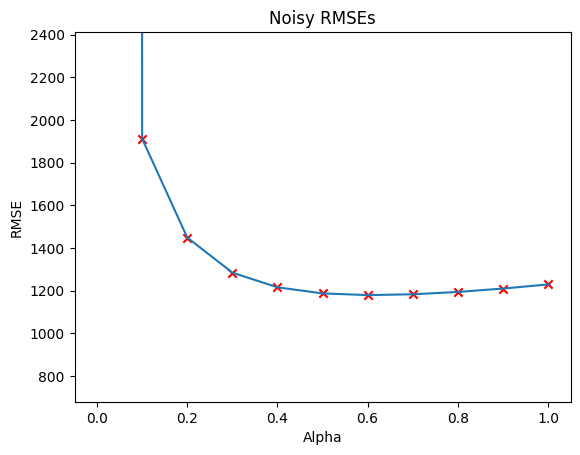

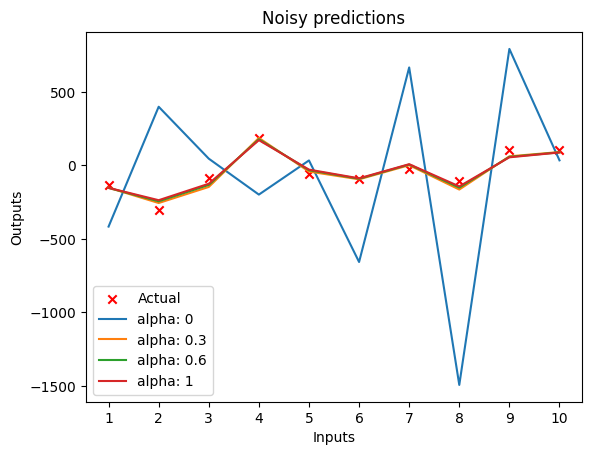

In [48]:
# for alpha in np.arange(0, 0.1, 1.1) fit ridge models and compute rmse
# if alpha in [0, 0.3, 0.6, 1], we want to hang onto its predictions 
# remember that floating point numbers don't do == 
# I got around this by enumerating the alphas and checking if i was 0, 3, 6 or 10 
#    for i, alpha in np.arange(0, 0.1, 1.1)
preds = []
rmses = []
for i, alpha in enumerate(np.arange(0, 1.1, 0.1)):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_noisy, y)
    ridge_preds = ridge.predict(X)
    if i in [0, 4, 7, 10]:
        preds.append(ridge_preds)
    rmses.append(rmse(y, ridge_preds))
plot_rmses("Noisy", rmses)
plot_alphas("Noisy", preds, y)

## Uninformative

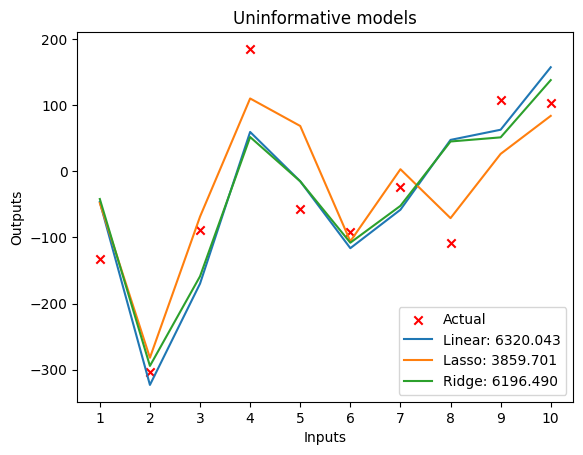

In [21]:
# fit all three models w/ alpha = 1 and pass them into plot_models
linear = LinearRegression()
lasso = Lasso(alpha=1)
ridge = Ridge(alpha=1)

linear.fit(X_uninformative, y)
lasso.fit(X_uninformative, y)
ridge.fit(X_uninformative, y)

linear_preds = linear.predict(X)
lasso_preds = lasso.predict(X)
ridge_preds = ridge.predict(X)

plot_models("Uninformative", linear_preds, lasso_preds, ridge_preds, y)

/tmp/ipykernel_20834/3341624902.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_uninformative, y)
/home/pgolbus/venvs/jupyter/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/pgolbus/venvs/jupyter/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+04, tolerance: 1.817e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


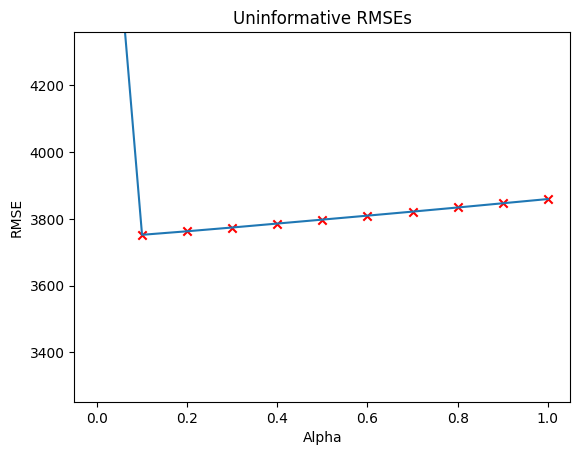

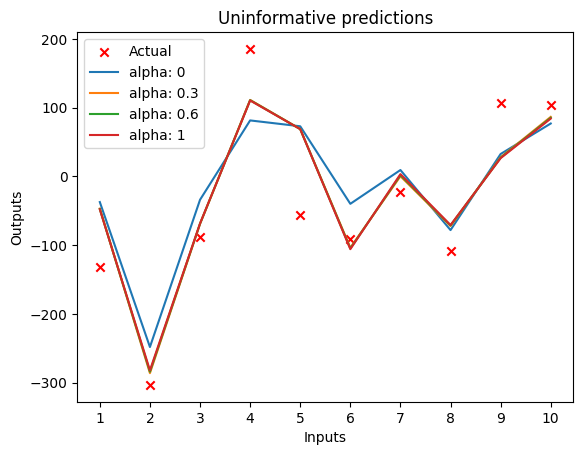

In [49]:
# for alpha in np.arange(0, 0.1, 1.1) fit ridge models and compute rmse
# if alpha in [0, 0.3, 0.6, 1], we want to hang onto its predictions 
# remember that floating point numbers don't do == 
# I got around this by enumerating the alphas and checking if i was 0, 3, 6 or 10 
#    for i, alpha in np.arange(0, 0.1, 1.1)
preds = []
rmses = []
for i, alpha in enumerate(np.arange(0, 1.1, 0.1)):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_uninformative, y)
    lasso_preds = lasso.predict(X)
    if i in [0, 4, 7, 10]:
        preds.append(lasso_preds)
    rmses.append(rmse(y, lasso_preds))
plot_rmses("Uninformative", rmses)
plot_alphas("Uninformative", preds, y)